In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [95]:
cwd = os.getcwd()

sim_label = '200cells-SF0.19-FInt0.016-FIC0.05-ICF0.03-ICInt0.05-IntF0.0045-0.55nA-full_network'

fig_dir = os.path.join(cwd, sim_label)
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [96]:
hearings = ['normal', 'loss']
without_ic = True
sim_data = {}

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):
    sim_name = f'{sim_label}-{hearing}'

    if without_ic:
        sim_name += '-no_IC'

    sim_dir = os.path.join('/home/kedoxey/Fusiform-IC_Network/output/fully_connected-data', sim_name)
    data_path = os.path.join(sim_dir, f'{sim_name}-tinnitus_small_net_data.pkl')
    data = pd.read_pickle(data_path)

    simData = data['simData']
    vs = simData['V_soma']
    spkt = np.array(simData['spkt'])
    spkid = np.array(simData['spkid'])

    sim_data[hearing] = {'vs': vs,
                         'spkt': spkt,
                         'spkid': spkid}

    


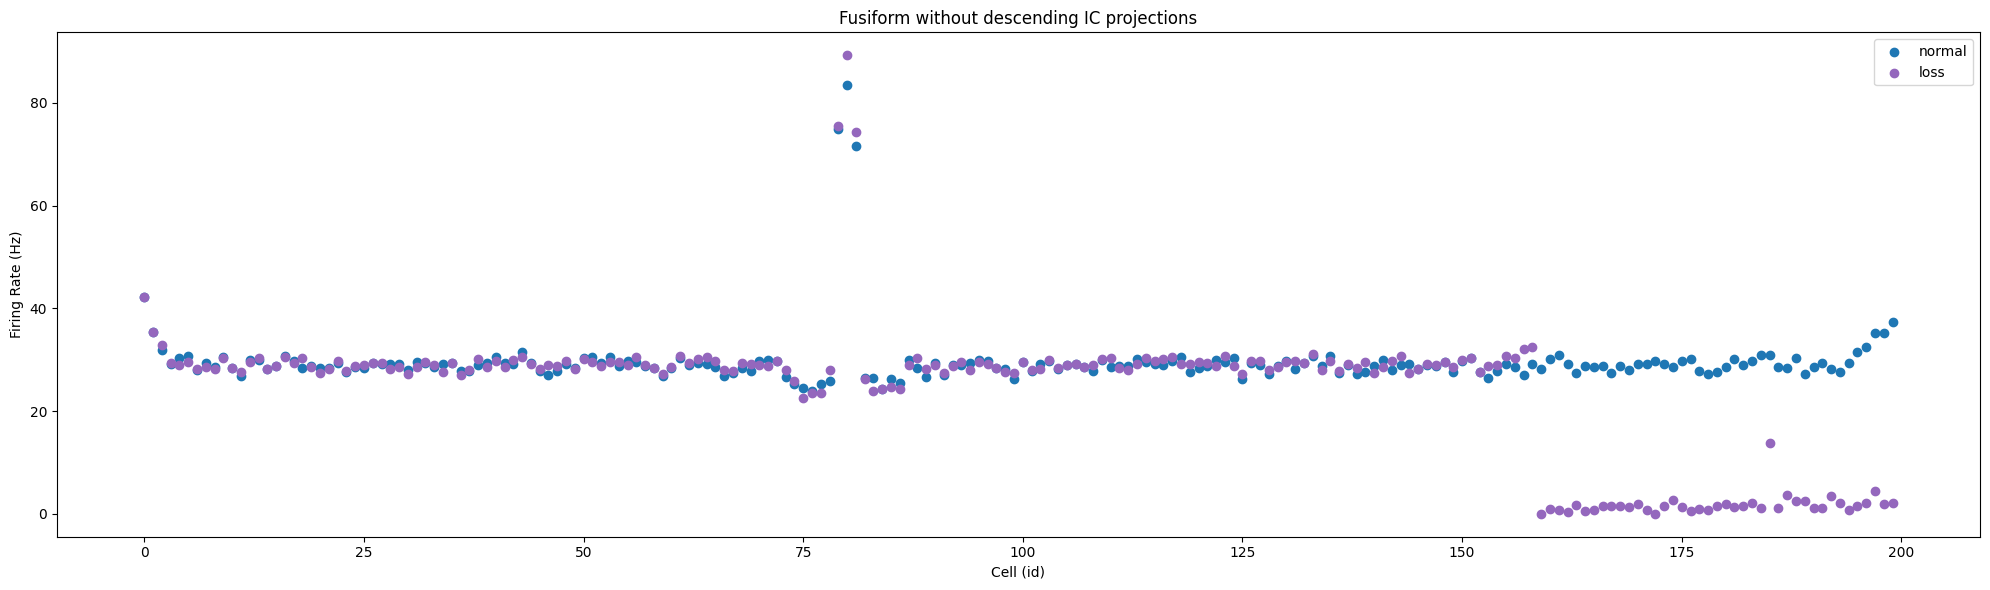

In [97]:
%matplotlib inline
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
# axs.ravel()

colors = ['tab:blue', 'tab:purple']
msf_data = {hearing: [] for hearing in hearings}

for row_i, hearing in enumerate(hearings):

    vs = sim_data[hearing]['vs']
    spkt = sim_data[hearing]['spkt']
    spkid = sim_data[hearing]['spkid']

    for i, cell_label in enumerate(vs.keys()):

        if ('dict' in cell_label) or ('pandas' in cell_label):
            break

        # print(i, cell_label)
        gid = int(cell_label.split('_')[1])

        spike_times = spkt[np.where(spkid == gid)]
        msf = (len(spike_times) - 1) / (spike_times[-1] - spike_times[0]) * 1000 if len(spike_times) > 1 else 0
        msf_data[hearing].append(msf)

        if i == 0:
            axs.scatter(i, msf, color=colors[row_i], label=hearing)
        else:
            axs.scatter(i, msf, color=colors[row_i])

axs.legend(loc='upper right')
axs.set_ylabel('Firing Rate (Hz)')
axs.set_xlabel('Cell (id)')
axs.set_title('Fusiform without descending IC projections')
fig.tight_layout()
fig.savefig(os.path.join(fig_dir,f'{sim_label}-no_IC-f_rates.png'), dpi=300)


In [98]:
hearings = ['normal', 'loss']
without_ic = False
sim_data_ic = {}

colors = ['tab:blue', 'tab:purple']

for row_i, hearing in enumerate(hearings):
    sim_name = f'{sim_label}-{hearing}'

    if without_ic:
        sim_name += '-no_IC'

    sim_dir = os.path.join('/home/kedoxey/Fusiform-IC_Network/output/fully_connected-data', sim_name)
    data_path = os.path.join(sim_dir, f'{sim_name}-tinnitus_small_net_data.pkl')
    data = pd.read_pickle(data_path)

    simData = data['simData']
    vs = simData['V_soma']
    spkt = np.array(simData['spkt'])
    spkid = np.array(simData['spkid'])

    sim_data_ic[hearing] = {'vs': vs,
                            'spkt': spkt,
                            'spkid': spkid}

    


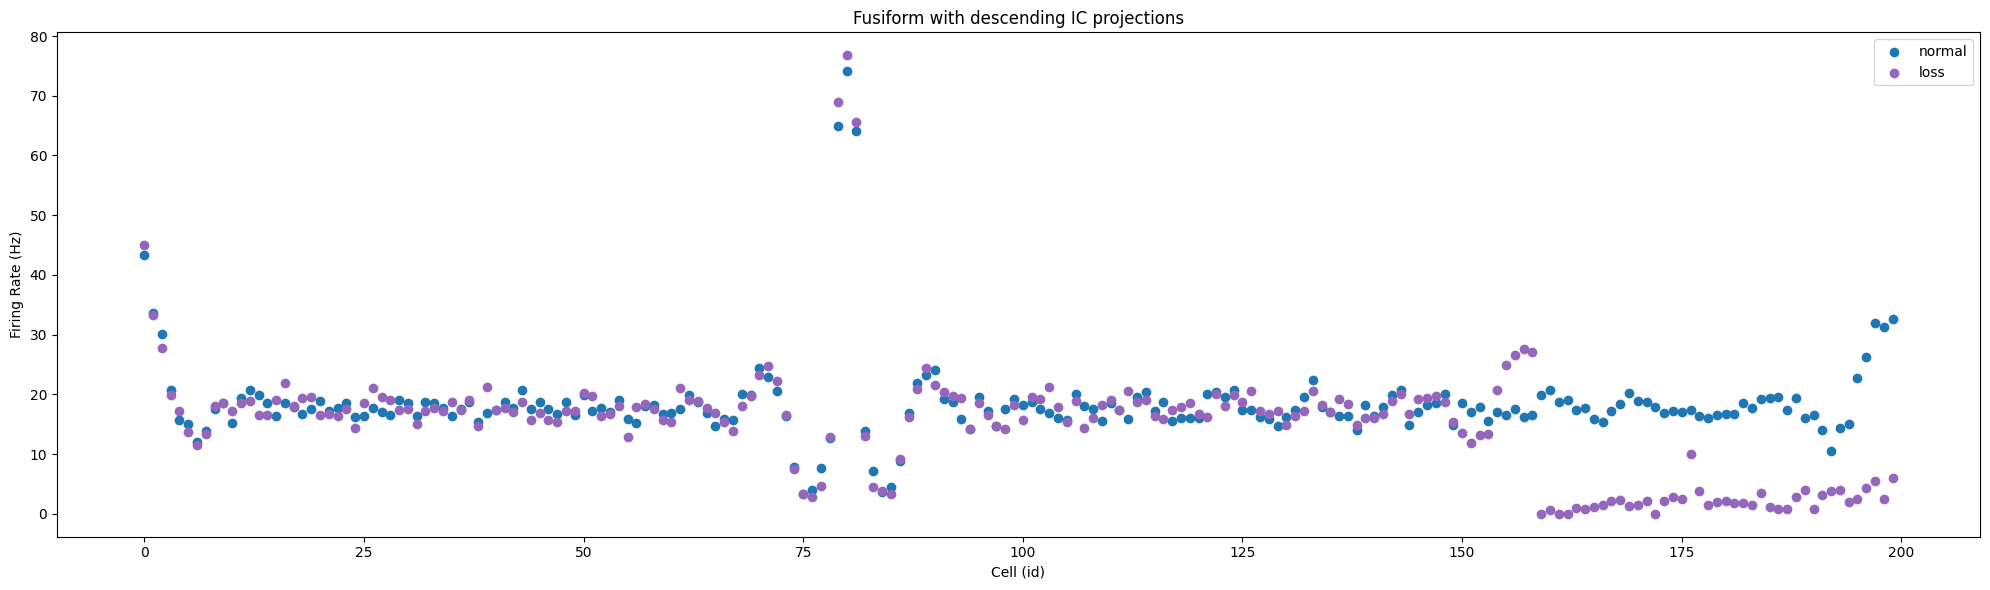

In [99]:
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
# axs.ravel()

colors = ['tab:blue', 'tab:purple']

msf_data_ic = {hearing: [] for hearing in hearings}

for row_i, hearing in enumerate(hearings):

    vs = sim_data_ic[hearing]['vs']
    spkt = sim_data_ic[hearing]['spkt']
    spkid = sim_data_ic[hearing]['spkid']

    for i, cell_label in enumerate(vs.keys()):

        if ('dict' in cell_label) or ('pandas' in cell_label):
            break

        # print(i, cell_label)
        gid = int(cell_label.split('_')[1])

        spike_times = spkt[np.where(spkid == gid)]
        msf = (len(spike_times) - 1) / (spike_times[-1] - spike_times[0]) * 1000 if len(spike_times) > 1 else 0
        msf_data_ic[hearing].append(msf)

        if i == 0:
            axs.scatter(i, msf, color=colors[row_i], label=hearing)
        else:
            axs.scatter(i, msf, color=colors[row_i])

axs.legend(loc='upper right')
axs.set_ylabel('Firing Rate (Hz)')
axs.set_xlabel('Cell (id)')
axs.set_title('Fusiform with descending IC projections')
fig.tight_layout()
fig.savefig(os.path.join(fig_dir, f'{sim_label}-f_rates.png'), dpi=300)

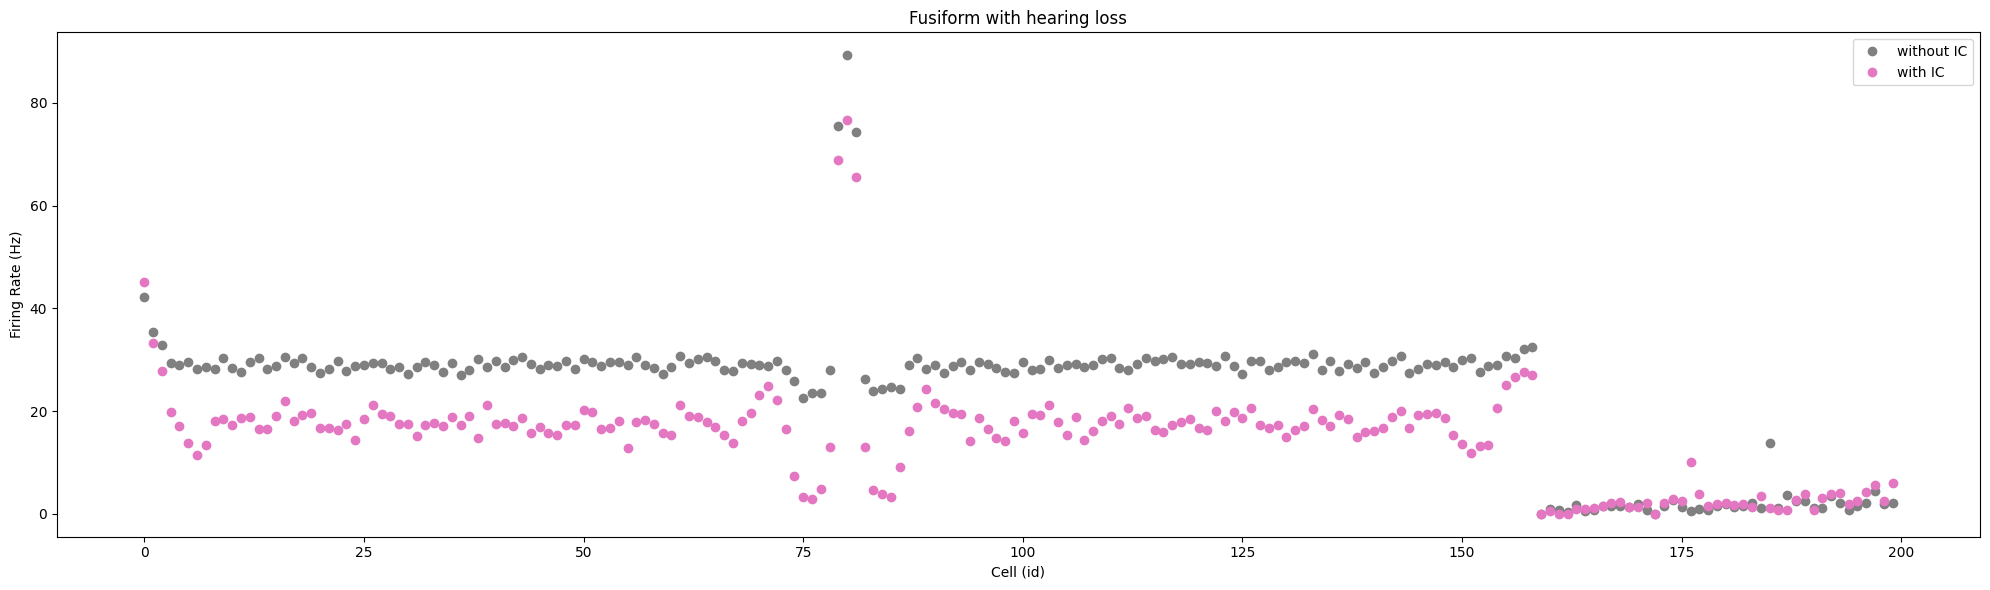

In [100]:
fig, axs = plt.subplots(1, 1, figsize=(20, 6))

axs.plot(msf_data['loss'], 'o', label='without IC', color='grey')
axs.plot(msf_data_ic['loss'], 'o', label='with IC', color='tab:pink')

axs.set_ylabel('Firing Rate (Hz)')
axs.set_xlabel('Cell (id)')
axs.set_title('Fusiform with hearing loss')
axs.legend(loc='upper right')
fig.tight_layout()
fig.savefig(os.path.join(fig_dir, f'{sim_label}-loss.png'), dpi=300)

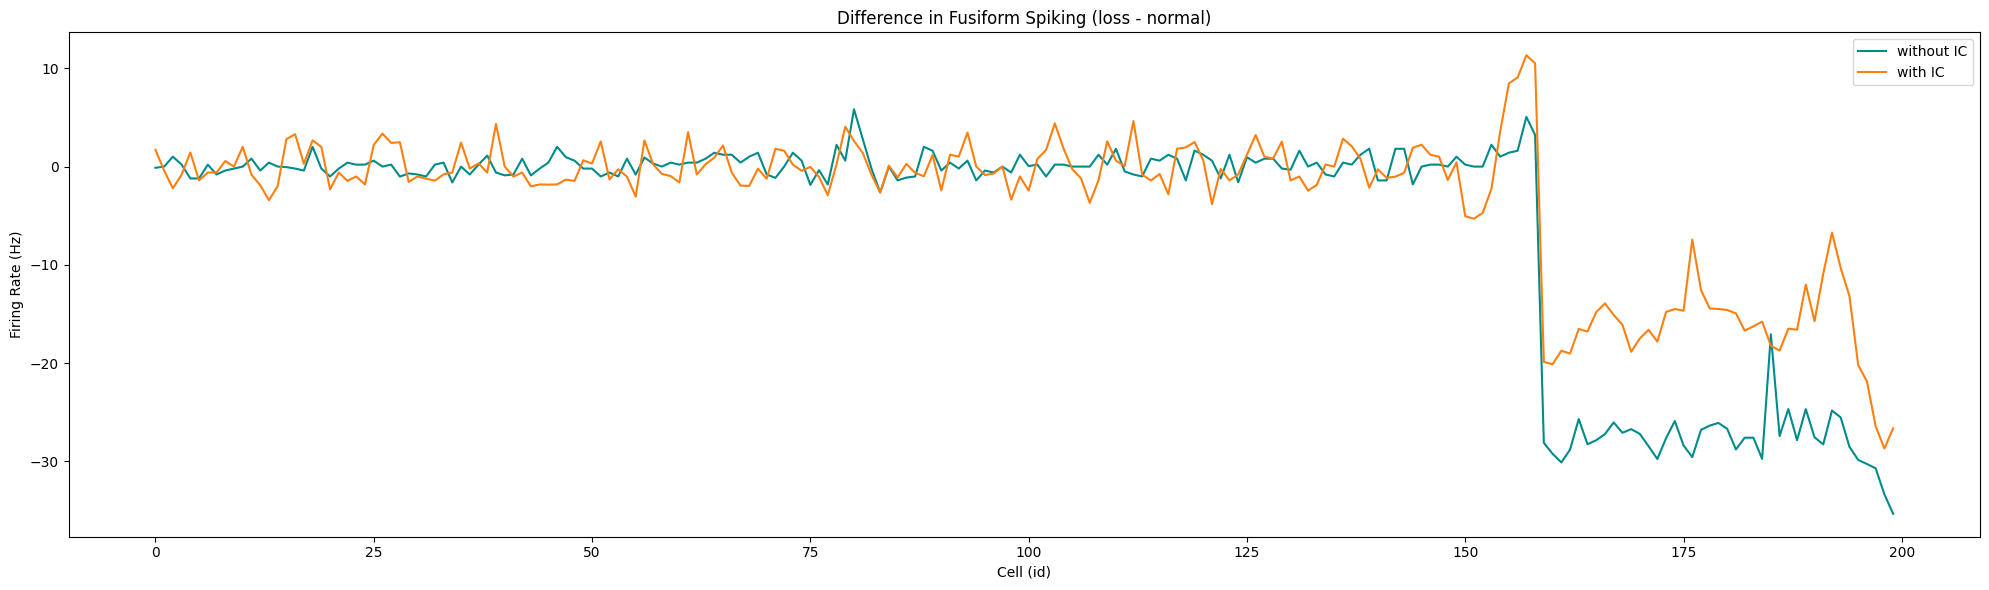

In [101]:
msf_diff = np.subtract(np.array(msf_data['loss']),np.array(msf_data['normal']))
msf_diff_ic = np.subtract(np.array(msf_data_ic['loss']),np.array(msf_data_ic['normal']))

fig, axs = plt.subplots(1, 1, figsize=(20, 6))

axs.plot(msf_diff, label='without IC', color='darkcyan')
axs.plot(msf_diff_ic, label='with IC', color='tab:orange')

axs.set_ylabel('Firing Rate (Hz)')
axs.set_xlabel('Cell (id)')
axs.set_title('Difference in Fusiform Spiking (loss - normal)')
axs.legend(loc='upper right')
fig.tight_layout()
fig.savefig(os.path.join(fig_dir, f'{sim_label}-diff.png'), dpi=300)
